# **Importing the necessary libraries**
---

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the House prices dataset into dataframe named `data`

In [0]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/my_work/Copy of dataset_houseprice_20200110.csv",index_col=0)

In [0]:
data_1 = data

In [0]:
data = data_1

# Looking for first five rows of data

In [8]:
data.head()

,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
BBL,,,,,,,,,,,,,,,,,,,,,,,,,,
BATE,100058033,51AED98D6EAC441A8576029E4ADD4EE9,3550000.0,3500000.0,100,7,2019-10-07 00:00:00 UTC,2019-12-05 00:00:00 UTC,2020-01-03 00:00:00 UTC,0,False,1963-01-01 00:00:00 UTC,90.0,NaN,NaN,90.0,278646.84,2020-01-03 15:10:43 UTC,Leilighet,4-roms,4.0,4023,3.0,Agathe Backer Grøndahls vei,PU,Fellesparkering ute
SORBBL,100007095,3CEA30EA5629450F8444EF85A2698C27,NaN,170000.0,311,7,NaN,1998-12-01 00:00:00 UTC,1998-12-01 00:00:00 UTC,2,False,1969-12-31 00:00:00 UTC,NaN,34.0,37.0,33.0,331240.05,2018-03-27 13:21:20 UTC,Leilighet,311-001,2.0,4700,6.0,Skolevegen,F,Felles parkeringsplass
KBBL,100001456,CB8E121D07624327A82AFD195EC86169,NaN,NaN,180,416,NaN,NaN,2009-08-01 00:00:00 UTC,4,True,2007-11-01 00:00:00 UTC,NaN,96.0,NaN,NaN,1450800.00,2016-08-01 10:57:05 UTC,Flermannsbolig,leilighet,3.0,6507,1.0,Sjursvikveien,FG,Eier plass i garasjeanlegg
KBBL,100001284,ABE758E620914AC389732C9D63E4C478,NaN,NaN,180,417,NaN,NaN,2007-11-12 00:00:00 UTC,4,True,2007-11-01 00:00:00 UTC,NaN,156.0,NaN,NaN,1625000.00,2017-05-10 08:33:32 UTC,Flermannsbolig,leilighet,4.0,6507,1.0,Sjursvikveien,FG,Eier plass i garasjeanlegg
KBBL,100001263,2BB654EA324943E4B6FC6EEDA018FA0B,NaN,NaN,180,310,NaN,NaN,2008-03-07 00:00:00 UTC,3,True,2007-11-01 00:00:00 UTC,NaN,69.0,NaN,NaN,997705.38,2020-01-02 12:02:24 UTC,Flermannsbolig,leilighet,2.0,6507,1.0,Sjursvikveien,FG,Eier plass i garasjeanlegg


In [0]:
data = data.reset_index()

# Let's look for some important information of dataset.

In [10]:
data.shape

(998396, 27)

> - ***Dataset is having `998396` records having `27` features.***

### Concise summary of a DataFrame after dropping duplicate rows and un-necessary columns

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998396 entries, 0 to 998395
Data columns (total 27 columns):
BBL                    998396 non-null object
Mission_Nb             998396 non-null int64
Apt_ID                 998396 non-null object
Estimated_Price        155269 non-null float64
Sold_Price             672434 non-null float64
Customer_Nb            998396 non-null int64
Apt_Nb                 998396 non-null int64
Mission_Date           466566 non-null object
Acceptance_Date        489999 non-null object
Transfer_Date          950486 non-null object
Floor                  827841 non-null object
Lift                   998396 non-null bool
Completion_Date        427668 non-null object
Living_Area            477687 non-null float64
Usable_Area            482712 non-null float64
Brutto_Area            100065 non-null float64
Primary_Area           307470 non-null float64
Community_Loan         855978 non-null float64
Updated                978441 non-null object
Apt_Type     

In [12]:
data.BBL.value_counts().count()

36

In [13]:
data.Mission_Nb.value_counts().count()

278780

In [14]:
data.Apt_ID.value_counts().count()

782630

In [15]:
data.Mission_Nb.is_unique

False

In [16]:
data.Apt_ID.is_unique

False

> - `Mission_Nb` and `Apt_Nb` can be the identifier for the each row. There should be unique values for these columns.
> - The above result shows that there are duplicates records present in dataset if we consider one of them as identifier and we need remove those duplicate records.

In [17]:
data[data.Mission_Nb == 100007095]

,BBL,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
1,SORBBL,100007095,3CEA30EA5629450F8444EF85A2698C27,NaN,170000.0,311,7,NaN,1998-12-01 00:00:00 UTC,1998-12-01 00:00:00 UTC,2,False,1969-12-31 00:00:00 UTC,NaN,34.0,37.0,33.0,331240.05,2018-03-27 13:21:20 UTC,Leilighet,311-001,2.0,4700,6.0,Skolevegen,F,Felles parkeringsplass
34052,BORI,100007095,D78BA731F4134893A00B4FCA32DF75B4,NaN,1350000.0,272,724,NaN,NaN,2007-02-20 00:00:00 UTC,3,False,NaN,NaN,49.0,NaN,NaN,72518.41,2013-08-27 14:22:18 UTC,Leilighet,Kategori 10,2.0,2013,39.0,Riihimækiveien,E,Se egen info
57717,SORBBL,100007095,3CEA30EA5629450F8444EF85A2698C27,NaN,170000.0,311,7,NaN,1998-12-01 00:00:00 UTC,1998-12-01 00:00:00 UTC,2,False,1969-12-31 00:00:00 UTC,NaN,34.0,37.0,33.0,321075.34,2020-01-02 15:32:37 UTC,Leilighet,311-001,2.0,4700,6.0,Skolevegen,F,Felles parkeringsplass
99729,SKIEN,100007095,E3B2825DA7124CF3B269979B7458BDB0,NaN,370000.0,97,4260,NaN,1988-07-04 00:00:00 UTC,1988-07-04 00:00:00 UTC,NaN,False,1980-01-01 00:00:00 UTC,95.0,NaN,NaN,NaN,292022.00,2014-06-06 12:56:12 UTC,Leilighet,097-441,4.0,3711,50.0,Borgemarka,I,Ingen
118557,LABO,100007095,AA26F9B1EEFB49AC9584193E5CA3CF57,NaN,NaN,50,9,NaN,NaN,2009-12-01 00:00:00 UTC,1,False,1974-01-01 00:00:00 UTC,85.0,NaN,NaN,NaN,666600.29,2009-12-22 08:47:22 UTC,Leilighet,050-001,4.0,3274,109.0,Hovlandveien,I,Ingen
119715,OBF,100007095,237F0F5A5935490294CCCF87CEA65025,NaN,150000.0,374,3,NaN,1996-07-01 00:00:00 UTC,1996-07-01 00:00:00 UTC,A2H,False,NaN,52.0,58.0,NaN,NaN,256160.04,2012-01-17 10:29:05 UTC,Leilighet,374-002,2.0,0553,18.0,HELGESENS GATE,I,Ingen
179043,VANSJOBBL,100007095,068E568346794578BC1954D1AEC84620,1100000.0,1100000.0,201,61,2011-04-20 00:00:00 UTC,2011-04-20 00:00:00 UTC,2011-07-07 00:00:00 UTC,1,False,1956-02-25 00:00:00 UTC,NaN,44.0,NaN,NaN,117547.10,2017-06-07 08:40:57 UTC,Leilighet,2 roms korsd B/E,2.0,1580,10.0,Skoleveien,I,Ingen
394444,PBBL,100007095,54FE5038750E4B6C9387D7499492086D,NaN,375000.0,38,1019,NaN,2000-12-20 00:00:00 UTC,2000-12-20 00:00:00 UTC,3.,False,NaN,39.0,NaN,NaN,NaN,135802.00,2016-07-13 10:50:20 UTC,Leilighet,001-2 rom,2.0,3946,20.0,Skrivervegen,I,Ingen
413186,NBBO,100007095,F2793FDD3AD64244857EF22913574590,NaN,NaN,541,5,NaN,NaN,2007-02-15 00:00:00 UTC,2,False,NaN,NaN,115.0,146.0,NaN,NaN,2007-03-22 11:59:15 UTC,Leilighet,Kategori 1,NaN,3400,12.0,Fjordsvingen,C,Carport
413875,MOBORANA,100007095,3305AC8912634555870A7AC9BC526893,NaN,NaN,187,5,2019-08-20 00:00:00 UTC,2019-07-03 00:00:00 UTC,2019-07-23 00:00:00 UTC,2,False,NaN,NaN,78.0,NaN,NaN,1745000.00,2019-09-02 15:49:44 UTC,Leilighet,3-roms,3.0,NaN,11.0,Svartflågveien,C,Carport


> - Above result show that there are multiple records for particular 'Mission_Nb' having different values for other features. So it can't be the identifier.
> - We can check for duplicates records based on `'Apt_ID'`.

In [18]:
data[data.Apt_ID == 'DBC59FA3287D4FBAA52E1518D03BCE27']

,BBL,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
794318,BATE,100007095,DBC59FA3287D4FBAA52E1518D03BCE27,1530000.0,1675000.0,102,135,2006-09-14 00:00:00 UTC,2006-09-26 00:00:00 UTC,2006-10-06 00:00:00 UTC,6,True,1973-01-01 00:00:00 UTC,63.0,NaN,NaN,63.0,209768.6,2019-05-31 10:36:41 UTC,Leilighet,2-roms,2.0,4022,11.0,Rektor Berntsens gate,U,Uspesifisert parkering
854359,BATE,100007095,DBC59FA3287D4FBAA52E1518D03BCE27,1530000.0,1675000.0,102,135,2006-09-14 00:00:00 UTC,2006-09-26 00:00:00 UTC,2006-10-06 00:00:00 UTC,6,True,1973-01-01 00:00:00 UTC,63.0,NaN,NaN,63.0,211767.1,2019-01-22 13:46:24 UTC,Leilighet,2-roms,2.0,4022,11.0,Rektor Berntsens gate,U,Uspesifisert parkering


In [19]:
data[data.Apt_ID == '2BB654EA324943E4B6FC6EEDA018FA0B']

,BBL,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
4,KBBL,100001263,2BB654EA324943E4B6FC6EEDA018FA0B,NaN,NaN,180,310,NaN,NaN,2008-03-07 00:00:00 UTC,3,True,2007-11-01 00:00:00 UTC,NaN,69.0,NaN,NaN,997705.38,2020-01-02 12:02:24 UTC,Flermannsbolig,leilighet,2.0,6507,1.0,Sjursvikveien,FG,Eier plass i garasjeanlegg
23073,KBBL,100001263,2BB654EA324943E4B6FC6EEDA018FA0B,NaN,NaN,180,310,NaN,NaN,2008-03-07 00:00:00 UTC,3,True,2007-11-01 00:00:00 UTC,NaN,69.0,NaN,NaN,890000.00,2019-03-07 11:21:25 UTC,Flermannsbolig,leilighet,2.0,6507,1.0,Sjursvikveien,FG,Eier plass i garasjeanlegg


In [20]:
data.shape

(998396, 27)

In [21]:
data[data.duplicated(subset=['Apt_ID','Mission_Nb'])]

,BBL,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
381,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 14:48:14 UTC,2019-04-10 00:00:00 UTC,2019-06-24 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,530481.34,2016-08-08 10:27:43 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
515,BATE,100058033,51AED98D6EAC441A8576029E4ADD4EE9,3550000.0,NaN,100,7,2019-10-07 16:49:03 UTC,NaN,NaN,0,False,1963-01-01 00:00:00 UTC,90.0,NaN,NaN,90.0,287645.25,2017-08-24 10:54:17 UTC,Leilighet,4-roms,4.0,4023,3.0,Agathe Backer Grøndahls vei,PU,Fellesparkering ute
551,TOBB,1000077654,CCC8D25F7B3247BE8F1122FD1E233ABF,NaN,NaN,1006,72,NaN,NaN,2018-12-04 00:00:00 UTC,2,True,NaN,NaN,82.0,NaN,NaN,NaN,2019-09-04 08:57:45 UTC,Bolig,82 kvm,3.0,NaN,7.0,Øvre Granåslia,NS,Kjøpt plass i p.kjeller. Kan følge leiligheten...
588,TOBB,1000077213,2A295FF850ED4394A54389B21B65563C,NaN,NaN,888,29,NaN,NaN,2019-01-01 00:00:00 UTC,5,True,NaN,NaN,128.0,NaN,NaN,NaN,2019-05-29 07:47:09 UTC,Bolig,3-roms 128 m2,3.0,NaN,6.0,Dokkgata,LP,Følger en p.plass i lukket parkeringskjeller m...
686,TOBB,1000083761,D064F9B4007A4654986DC551ADB0051E,NaN,NaN,1086,14,NaN,NaN,2020-01-01 00:00:00 UTC,0,True,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-20 10:47:18 UTC,Bolig,Leilighet,NaN,NaN,7.0,Nardovegen,NI,Ingen parkering på eiendommen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998388,SOBBL,100005536,90E053F82AC8467A95045FEBE189B84C,NaN,700000.0,50,62,NaN,NaN,2005-03-11 00:00:00 UTC,01,False,NaN,NaN,NaN,NaN,57.0,208507.88,2019-10-23 13:51:06 UTC,Leilighet,Kategori 1,2.0,1709,37.0,Blessomveien,M,Biloppstillingsplass - borettslaget har noen g...
998389,SOBBL,100022297,C7356682FA1949988F6BA0356975FB5E,NaN,NaN,50,65,2019-05-21 14:19:35 UTC,NaN,NaN,02,False,NaN,NaN,NaN,NaN,57.0,218389.28,2018-11-07 09:12:06 UTC,Leilighet,Kategori 1,2.0,1709,37.0,Blessomveien,M,Biloppstillingsplass - borettslaget har noen g...
998390,SOBBL,100018370,59B14D6810F44827ABBD427C6F02E4CD,NaN,1200000.0,50,83,2013-07-22 00:00:00 UTC,2013-08-23 00:00:00 UTC,2013-10-18 00:00:00 UTC,02,False,NaN,NaN,NaN,NaN,56.0,215081.25,2019-06-18 12:48:43 UTC,Leilighet,Kategori 1,2.0,1709,37.0,Blessomveien,M,Biloppstillingsplass - borettslaget har noen g...
998394,SOBBL,100014393,1698D56CF1D34AA5AA9F01CD900639DD,NaN,790000.0,411,407,NaN,2008-10-02 00:00:00 UTC,2008-10-02 00:00:00 UTC,4,True,NaN,NaN,NaN,NaN,52.0,545809.15,2018-01-17 10:16:03 UTC,Leilighet,Kategori 1,2.0,1718,114.0,Dalveien,M,Biloppstillingsplass - borettslaget har noen g...


In [22]:
data[(data.Apt_ID == '624198AC1C694EECABBB6DBCC785FF58')]

,BBL,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
380,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 00:00:00 UTC,2019-04-10 00:00:00 UTC,2019-06-21 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,520890.21,2019-07-12 15:46:46 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
381,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 14:48:14 UTC,2019-04-10 00:00:00 UTC,2019-06-24 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,530481.34,2016-08-08 10:27:43 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
20717,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 00:00:00 UTC,2019-04-10 00:00:00 UTC,2019-06-21 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,530481.34,2016-08-08 10:27:43 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
54252,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 14:48:14 UTC,2019-04-10 00:00:00 UTC,2019-06-24 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,520890.21,2019-07-12 15:46:46 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info


In [23]:
data[data.Mission_Nb == 100041145]

,BBL,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
380,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 00:00:00 UTC,2019-04-10 00:00:00 UTC,2019-06-21 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,520890.21,2019-07-12 15:46:46 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
381,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 14:48:14 UTC,2019-04-10 00:00:00 UTC,2019-06-24 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,530481.34,2016-08-08 10:27:43 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
20717,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 00:00:00 UTC,2019-04-10 00:00:00 UTC,2019-06-21 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,530481.34,2016-08-08 10:27:43 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
54252,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 14:48:14 UTC,2019-04-10 00:00:00 UTC,2019-06-24 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,520890.21,2019-07-12 15:46:46 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
479603,USBL,100041145,6D39C805FDFF4E438590A30D9CC9E4AA,NaN,1250000.0,948,10,NaN,2003-08-04 00:00:00 UTC,2003-08-04 00:00:00 UTC,1+2,False,1977-01-01 00:00:00 UTC,100.0,NaN,NaN,133.0,203478.52,2017-02-13 16:24:59 UTC,Leilighet,4-roms med garasje,4.0,3188,6.0,Redaktør Thommessens gate,G,Egen garasje
568681,BATE,100041145,9dd216daf5e34d58bc05f7913dc1ab07,NaN,0.0,328,71,NaN,1989-04-24 00:00:00 UTC,1989-04-24 00:00:00 UTC,3,False,NaN,NaN,51.0,NaN,NaN,222068.48,2019-03-11 11:03:40 UTC,Leilighet,Brøk 51,2.0,4315,28.0,Tyrihansveien,P,Parkeringsplass


In [24]:
data[(data.Mission_Nb == 100041145)].duplicated(subset=['Mission_Nb','Apt_ID'],keep = 'first')

380       False
381        True
20717      True
54252      True
479603    False
568681    False
dtype: bool

### With above observation we can conclude that,
> - There might be possibility that one apartment can have been sold several times.
> - There are some records where `'Apt_ID'` is same and `'Mission_Nb'` is different having records of apartment sold several times through years.
> - So we can drop duplicates based on both `'Apt_ID'` and `'Mission_Nb'` if present.

In [0]:
data.drop_duplicates(subset=['Mission_Nb','Apt_ID'],keep = 'first', inplace = True)

In [26]:
data.Apt_ID.is_unique

True

In [27]:
data.Mission_Nb.is_unique

False

#### Shape of dataset after dropping duplicate records.

In [28]:
data.shape

(782630, 27)

> - ***current dataset is having `782630` records having `27` features.***

In [29]:
data.Sold_Price.isna().sum().sum()

248884

In [30]:
data.Estimated_Price.isna().sum().sum()

661743

In [31]:
data[(data.Sold_Price.isna()) & (data.Estimated_Price.isna())].shape

(244796, 27)

In [32]:
data[(data.Sold_Price.notna()) & (data.Estimated_Price.isna())].shape

(416947, 27)

In [33]:
data[(data.Sold_Price.isna()) & (data.Estimated_Price.notna())].shape

(4088, 27)

In [34]:
data[(data.Sold_Price.notna()) & (data.Estimated_Price.notna())].shape

(116799, 27)

> - `'Sold_Price'` can be our target feature as we need to build model to predict the price for house given new data values.
> - But there are 248884 records for which `'Sold_Price'` is having null values.
> - Also there are 661743 records for which `'Estimated_Price'` is having null values.
> - `'Sold_Price'` and `'Estimated_Price'` are going in sync.
> - So we can assign values of `'Sold_Price'` and `'Estimated_Price'` to each other where one them is having null value. 
> - Then we can drop only records where `'Sold_Price'` and `'Estimated_Price'` both are null.

In [0]:
data[(data.Sold_Price.isna()) & (data.Estimated_Price.notna())].replace(data[(data.Sold_Price.isna()) & (data.Estimated_Price.notna())]['Sold_Price'],\
                                                                        data[(data.Sold_Price.isna()) & (data.Estimated_Price.notna())]['Estimated_Price'],inplace = True)

In [0]:
data.loc[(data.Sold_Price.isna()) & (data.Estimated_Price.notna()),'Sold_Price'] = data[(data.Sold_Price.isna()) & (data.Estimated_Price.notna())]['Estimated_Price']

In [0]:
data.loc[(data.Sold_Price.notna()) & (data.Estimated_Price.isna()),'Estimated_Price'] = data[(data.Sold_Price.notna()) & (data.Estimated_Price.isna())]['Sold_Price']

In [38]:
data[(data.Sold_Price.isna()) & (data.Estimated_Price.notna())].shape

(0, 27)

In [39]:
data[(data.Sold_Price.notna()) & (data.Estimated_Price.isna())].shape

(0, 27)

In [40]:
data.Sold_Price.isna().sum().sum()

244796

In [41]:
data[(data.Sold_Price.notna()) & (data.Estimated_Price.notna())].shape

(537834, 27)

In [0]:
data.drop(data[(data.Sold_Price.isna()) & (data.Estimated_Price.isna())].index,axis = 0, inplace = True)

In [0]:
data.drop('Estimated_Price',axis = 1, inplace = True)

In [44]:
data.shape

(537834, 26)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537834 entries, 0 to 998393
Data columns (total 26 columns):
BBL                    537834 non-null object
Mission_Nb             537834 non-null int64
Apt_ID                 537834 non-null object
Sold_Price             537834 non-null float64
Customer_Nb            537834 non-null int64
Apt_Nb                 537834 non-null int64
Mission_Date           294609 non-null object
Acceptance_Date        382767 non-null object
Transfer_Date          528689 non-null object
Floor                  459142 non-null object
Lift                   537834 non-null bool
Completion_Date        259265 non-null object
Living_Area            284492 non-null float64
Usable_Area            234684 non-null float64
Brutto_Area            57000 non-null float64
Primary_Area           192577 non-null float64
Community_Loan         496543 non-null float64
Updated                522920 non-null object
Apt_Type               537834 non-null object
Apt_Category   

# Let's look for correlation of numerical columns (`'Living_Area'`, `'Usable_Area'`,`'Brutto_Area'`, `'Primary_Area'` and `'Community_Loan'` on `'Sold_Price`')

In [0]:
con_num = data[['Living_Area', 'Usable_Area','Brutto_Area', 'Primary_Area', 'Community_Loan','Sold_Price']]

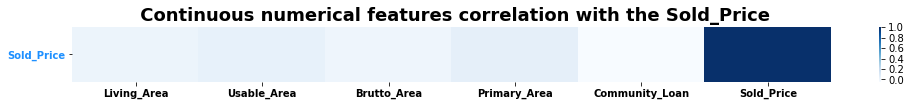

In [47]:
numcorr=con_num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['Sold_Price'], ascending=False).head(1), cmap='Blues')
plt.title(" Continuous numerical features correlation with the Sold_Price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [48]:
Num=numcorr['Sold_Price'].sort_values(ascending=False).head(6).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)

s = Num.style.background_gradient(cmap=cm)
s

,Sold_Price
Sold_Price,1
Primary_Area,0.0553384
Usable_Area,0.0442886
Living_Area,0.0197408
Brutto_Area,0.0119982
Community_Loan,-0.038974


In [49]:
data[(data.Primary_Area.notna()) & (data.Usable_Area.notna()) & (data.Living_Area.notna()) & (data.Brutto_Area.notna())][['Living_Area', 'Usable_Area','Brutto_Area', 'Primary_Area', 'Sold_Price']]

,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Sold_Price
43,75.0,91.0,97.0,80.0,1660000.0
47,67.0,80.0,90.0,67.0,1540000.0
48,71.0,71.0,75.0,71.0,1650000.0
49,80.0,79.0,84.0,79.0,2112000.0
53,61.0,63.0,69.0,63.0,1490000.0
...,...,...,...,...,...
957430,46.0,46.0,51.0,46.0,900000.0
957910,56.0,64.0,64.0,56.0,450000.0
961736,0.0,50.0,0.0,50.0,514300.0
961737,0.0,50.0,0.0,50.0,213300.0


In [0]:
con_num_1 = data[((data.Primary_Area.notna()) & (data.Usable_Area.notna()) & (data.Living_Area.notna()) & (data.Brutto_Area.notna())) & \
((data.Primary_Area > 0) & (data.Usable_Area > 0) & (data.Living_Area > 0) & (data.Brutto_Area > 0)) \
][['Living_Area', 'Usable_Area','Brutto_Area', 'Primary_Area', 'Sold_Price']]

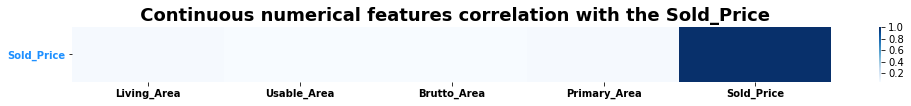

In [51]:
numcorr_1=con_num_1.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr_1.sort_values(by=['Sold_Price'], ascending=False).head(1), cmap='Blues')
plt.title(" Continuous numerical features correlation with the Sold_Price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [52]:
Num=numcorr_1['Sold_Price'].sort_values(ascending=False).head(5).to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,Sold_Price
Sold_Price,1
Primary_Area,0.0674848
Living_Area,0.06692
Usable_Area,0.056289
Brutto_Area,0.0542192


In [0]:
con_num_1['Total_Area'] = con_num_1['Living_Area'] + con_num_1['Usable_Area'] + con_num_1['Brutto_Area'] + con_num_1['Primary_Area']

In [54]:
con_num_1

,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Sold_Price,Total_Area
43,75.0,91.0,97.0,80.0,1660000.0,343.0
47,67.0,80.0,90.0,67.0,1540000.0,304.0
48,71.0,71.0,75.0,71.0,1650000.0,288.0
49,80.0,79.0,84.0,79.0,2112000.0,322.0
53,61.0,63.0,69.0,63.0,1490000.0,256.0
...,...,...,...,...,...,...
956904,99.0,99.0,105.0,99.0,1375000.0,402.0
957122,45.0,44.0,47.0,44.0,900000.0,180.0
957127,49.0,49.0,54.0,49.0,510000.0,201.0
957430,46.0,46.0,51.0,46.0,900000.0,189.0


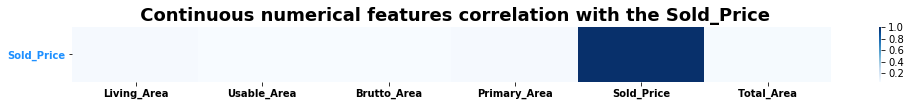

In [55]:
numcorr_1=con_num_1.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr_1.sort_values(by=['Sold_Price'], ascending=False).head(1), cmap='Blues')
plt.title(" Continuous numerical features correlation with the Sold_Price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [56]:
Num=numcorr_1['Sold_Price'].sort_values(ascending=False).head(6).to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,Sold_Price
Sold_Price,1
Primary_Area,0.0674848
Living_Area,0.06692
Total_Area,0.0627768
Usable_Area,0.056289
Brutto_Area,0.0542192


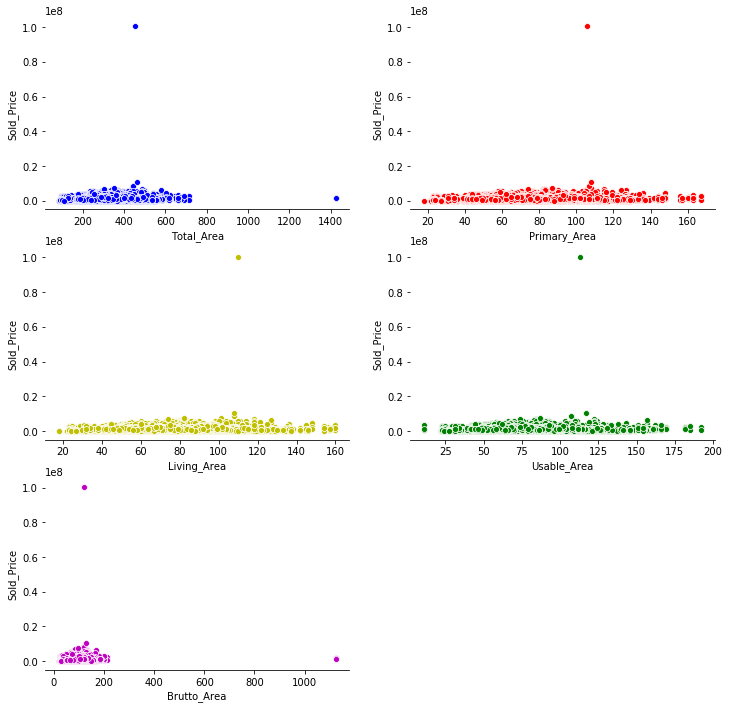

In [61]:
# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(12,12), ncols=2, nrows=3)
sns.despine(left=True)
sns.scatterplot(x= con_num_1.Total_Area, y= con_num_1.Sold_Price, color="b", ax=axes[0, 0])
sns.scatterplot(x= con_num_1.Primary_Area, y= con_num_1.Sold_Price, color="r", ax=axes[0, 1])
sns.scatterplot(x= con_num_1.Living_Area, y= con_num_1.Sold_Price, color="y", ax=axes[1, 0])
sns.scatterplot(x= con_num_1.Usable_Area, y= con_num_1.Sold_Price, color="g", ax=axes[1, 1])
sns.scatterplot(x= con_num_1.Brutto_Area, y= con_num_1.Sold_Price, color="m", ax=axes[2, 0])
axes[2,1].remove();

### All the area columns that we have with not null values and if we plot scatterplot of them with target feature `'Sold_Price'` then we find that,
> -  Correlation of all the variable with target feature is not seems to be good.
> - There is slight better correlation present between `'Brutto_Area'` and `'Sold_Price'`
> - Also we can see extreme values. That might be outliers.

In [58]:
con_num_1

,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Sold_Price,Total_Area
43,75.0,91.0,97.0,80.0,1660000.0,343.0
47,67.0,80.0,90.0,67.0,1540000.0,304.0
48,71.0,71.0,75.0,71.0,1650000.0,288.0
49,80.0,79.0,84.0,79.0,2112000.0,322.0
53,61.0,63.0,69.0,63.0,1490000.0,256.0
...,...,...,...,...,...,...
956904,99.0,99.0,105.0,99.0,1375000.0,402.0
957122,45.0,44.0,47.0,44.0,900000.0,180.0
957127,49.0,49.0,54.0,49.0,510000.0,201.0
957430,46.0,46.0,51.0,46.0,900000.0,189.0


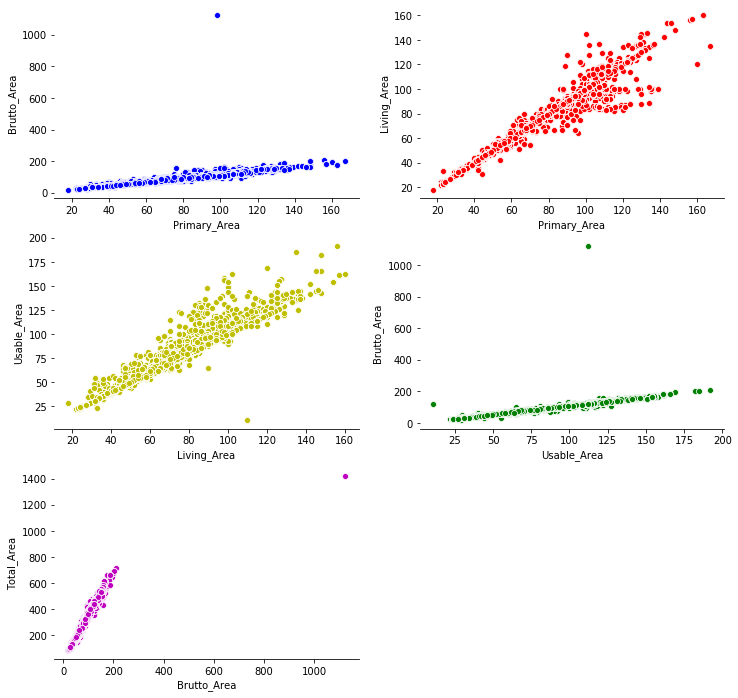

In [64]:
# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(12,12), ncols=2, nrows=3)
sns.despine(left=True)
sns.scatterplot(x= con_num_1.Primary_Area, y= con_num_1.Brutto_Area, color="b", ax=axes[0, 0])
sns.scatterplot(x= con_num_1.Primary_Area, y= con_num_1.Living_Area, color="r", ax=axes[0, 1])
sns.scatterplot(x= con_num_1.Living_Area, y= con_num_1.Usable_Area, color="y", ax=axes[1, 0])
sns.scatterplot(x= con_num_1.Usable_Area, y= con_num_1.Brutto_Area, color="g", ax=axes[1, 1])
sns.scatterplot(x= con_num_1.Brutto_Area, y= con_num_1.Total_Area, color="m", ax=axes[2, 0])
axes[2,1].remove();

> - values for `'Primary_Area'` and `'Living_Area'` are almost similar so we can keep either of them and drop other.
> - ALso all the area columns are highly correlated with each other.
> - Better way to handle above multicollinearity and to avoid lot of null value we can create new column called `'Area'` having values of `'Primary_Area'`.
> - If `'Primary_Area'` is null then we will assign `'living_Area'` to `'Area'`.
> - If `'living_Area'` is null then we will assign `'Usable_Area'` to `'Area'`.
> - If `'Usable_Area'` is null then we will assign `'Brutto_Area'` to `'Area'`.



In [0]:
data['Area'] = data['Primary_Area']

In [0]:
data.loc[((data.Primary_Area.isna()) | (data.Primary_Area == 0)) & ((data.Living_Area.notna()) | (data.Living_Area != 0)),'Primary_Area'] = \
        data.loc[((data.Primary_Area.isna()) | (data.Primary_Area == 0)) & ((data.Living_Area.notna()) | (data.Living_Area != 0)),'Living_Area']

In [0]:
data.loc[((data.Primary_Area.isna()) | (data.Primary_Area == 0)) & ((data.Usable_Area.notna()) | (data.Usable_Area != 0)),'Primary_Area'] = \
        data.loc[((data.Primary_Area.isna()) | (data.Primary_Area == 0)) & ((data.Usable_Area.notna()) | (data.Usable_Area != 0)),'Usable_Area']

In [0]:
data.loc[((data.Primary_Area.isna()) | (data.Primary_Area == 0)) & ((data.Brutto_Area.notna()) | (data.Brutto_Area != 0)),'Primary_Area'] = \
        data.loc[((data.Primary_Area.isna()) | (data.Primary_Area == 0)) & ((data.Brutto_Area.notna()) | (data.Brutto_Area != 0)),'Brutto_Area']

In [0]:
data['Area'] = data['Primary_Area']

In [0]:
data.drop(['Primary_Area','Living_Area','Usable_Area','Brutto_Area'],axis = 1, inplace = True)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537834 entries, 0 to 998393
Data columns (total 23 columns):
BBL                    537834 non-null object
Mission_Nb             537834 non-null int64
Apt_ID                 537834 non-null object
Sold_Price             537834 non-null float64
Customer_Nb            537834 non-null int64
Apt_Nb                 537834 non-null int64
Mission_Date           294609 non-null object
Acceptance_Date        382767 non-null object
Transfer_Date          528689 non-null object
Floor                  459142 non-null object
Lift                   537834 non-null bool
Completion_Date        259265 non-null object
Community_Loan         496543 non-null float64
Updated                522920 non-null object
Apt_Type               537834 non-null object
Apt_Category           537716 non-null object
Nb_of_Rooms            497510 non-null float64
Post_Code              500708 non-null object
Street_Nb              526834 non-null float64
Street_Name     

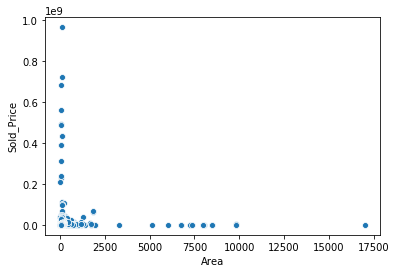

In [89]:
sns.scatterplot(data[(data.Area.notna()) | (data.Area > 0)]['Area'],data[(data.Area.notna()) | (data.Area > 0)]['Sold_Price'])

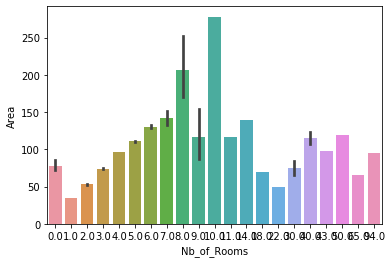

In [91]:
sns.barplot(data[(data.Area.notna()) | (data.Area > 0)]['Nb_of_Rooms'],data[(data.Area.notna()) | (data.Area > 0)]['Area'])

### We can also fill the `'Area'` having null values with the help of `'Nb_of_Rooms'`.
> - `'Area'` is propotional to `'Nb_of_Rooms'` and we can fill it with average value of Area for particular number of room. 

In [111]:
data.Area.isna().sum().sum()

15825

In [0]:
data.Area = data.groupby("Nb_of_Rooms")['Area'].apply(lambda x: x.fillna(x.mean()))

In [0]:
data.loc[((data.Area.notna()) | (data.Area != 0)) & ((data.Nb_of_Rooms.notna()) | (data.Nb_of_Rooms > 0)),'Area'] = \
    data[((data.Area.notna()) | (data.Area != 0)) & ((data.Nb_of_Rooms.notna()) | (data.Nb_of_Rooms > 0))].groupby("Nb_of_Rooms")['Area'].apply(lambda x: x.fillna(x.mean()))

In [0]:
data.loc[((data.Primary_Area.isna()) | (data.Primary_Area == 0)) & ((data.Living_Area.notna()) | (data.Living_Area != 0)),'Primary_Area'] =

In [100]:
data[((data.Area.isna()) | (data.Area == 0)) & ((data.Nb_of_Rooms.notna()) | (data.Nb_of_Rooms > 0))]['Nb_of_Rooms'].value_counts()

3.0     10210
2.0      8952
4.0      8917
0.0      8405
1.0      5019
5.0      1018
6.0        64
9.0         3
7.0         2
25.0        1
Name: Nb_of_Rooms, dtype: int64

## We need to work more on data cleaning as there are multiple columns having null values.

### Let's look for average of missing value for each column

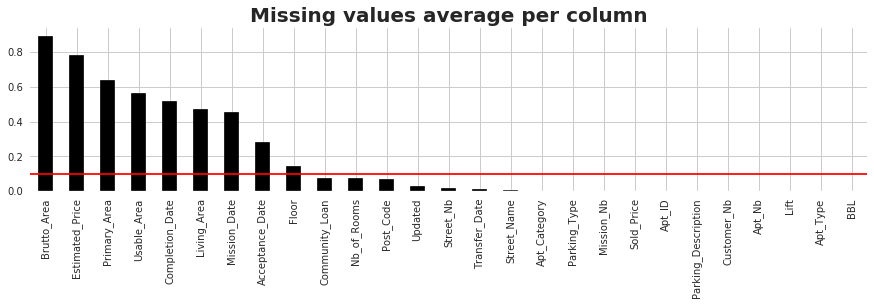

In [0]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.subplots(0,0,figsize=(15,3))
data.isna().mean().sort_values(ascending=False).plot.bar(color='black')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.title('Missing values average per column', fontsize=20, weight='bold' )
plt.show()

> - As we can observe above, `'Brutto_Area' having around `'90 %'` of null values.
> - Also `'Estimated_Price'`, `'Primary_Area'`, `'Usable_Area'` and `'Living_Area'` also having significantally more number of null values.

In [0]:
data[data.Primary_Area.notna() & data.Usable_Area.notna() & data.Living_Area.notna()][['Primary_Area','Usable_Area','Living_Area']]

,Primary_Area,Usable_Area,Living_Area
43,80.0,91.0,75.0
47,67.0,80.0,67.0
48,71.0,71.0,71.0
49,79.0,79.0,80.0
50,76.0,86.0,85.0
...,...,...,...
988135,51.0,51.0,51.0
988920,109.0,114.0,109.0
988975,65.0,69.0,65.0
989055,51.0,51.0,51.0


> - values for `'Primary_Area'` and `'Living_Area'` are almost similar so we can keep either of them and drop other.

In [0]:
data.Primary_Area.notna().sum()

191108

In [0]:
data[data.Primary_Area == 0]['Primary_Area'].count()

812

In [0]:
data.Living_Area.notna().sum()

282330

In [0]:
data[data.Living_Area == 0]['Living_Area'].count()

18356

In [0]:
data.Usable_Area.notna().sum()

232292

In [0]:
data[data.Usable_Area == 0]['Usable_Area'].count()

47811

In [0]:
191108 - 812

190296

In [0]:
282330 - 18356

263974

In [0]:
232292 - 47811

184481

In [0]:
data[(data.Primary_Area == 0) & (data.Living_Area.notna()) & (data.Living_Area > 0)][['Primary_Area','Usable_Area','Living_Area']]

,Primary_Area,Usable_Area,Living_Area
5651,0.0,76.0,73.0
79501,0.0,82.0,78.0
89138,0.0,NaN,72.0
93191,0.0,NaN,63.0
110988,0.0,50.0,47.0
113441,0.0,NaN,63.0
115445,0.0,85.0,85.0
139497,0.0,79.0,75.0
163908,0.0,76.0,73.0
170087,0.0,93.0,88.0


In [0]:
data[(data.Living_Area == 0) & (data.Primary_Area.notna()) & (data.Primary_Area > 0)][['Primary_Area','Usable_Area','Living_Area']]

,Primary_Area,Usable_Area,Living_Area
732,55.0,55.0,0.0
2121,47.0,50.0,0.0
2845,75.0,79.0,0.0
3094,75.0,88.0,0.0
4033,55.0,55.0,0.0
...,...,...,...
957478,46.0,46.0,0.0
957480,84.0,91.0,0.0
961736,50.0,50.0,0.0
961737,50.0,50.0,0.0


In [0]:
d = list(data[(data.Living_Area == 0) & (data.Primary_Area.notna()) & (data.Primary_Area > 0)]['Primary_Area'])

In [0]:
data.Living_Area[(data.Living_Area == 0) & (data.Primary_Area.notna()) & (data.Primary_Area > 0)] = d

> - Instead of using both `'Primary_Area'` and `'Living_Area'` we are using only `'Primary_Area'` as both value are having almost similar values.
> - We are dropping over `'Primary_Area'` over `'Living_Area'` because `'Primary_Area'` is having comparably more number of null values.
> - Before dropping we copied value of `'Primary_Living'` area to `'Living_Area'` where `'Living_Area'` is having value `0`.

In [0]:
data.drop('Primary_Area',axis = 1, inplace = True)

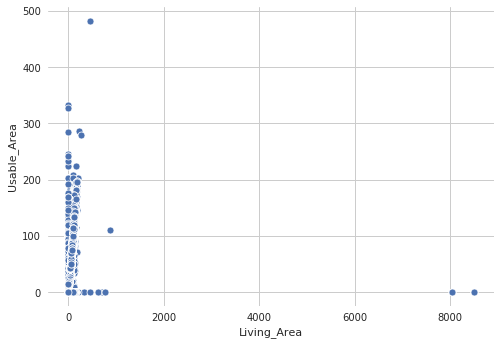

In [0]:
sns.scatterplot(data.Living_Area,data.Usable_Area)

In [0]:
data[['Living_Area','Usable_Area']][(data.Living_Area.notna() & data.Usable_Area.notna()) & ((data.Living_Area > 0) & (data.Usable_Area > 0))].corr()

,Living_Area,Usable_Area
Living_Area,1.000000,0.879594
Usable_Area,0.879594,1.000000


> - There is very high correlation between `'Living_Area'` and `'Usable_Area'` where both features having values (i.e. not containing null and 0).
> - So we can drop `'Usable_Area'` too.

In [0]:
data.drop('Usable_Area',axis = 1, inplace = True)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533746 entries, 0 to 998393
Data columns (total 25 columns):
BBL                    533746 non-null object
Mission_Nb             533746 non-null int64
Apt_ID                 533746 non-null object
Estimated_Price        116799 non-null float64
Sold_Price             533746 non-null float64
Customer_Nb            533746 non-null int64
Apt_Nb                 533746 non-null int64
Mission_Date           290828 non-null object
Acceptance_Date        382369 non-null object
Transfer_Date          527501 non-null object
Floor                  455551 non-null object
Lift                   533746 non-null bool
Completion_Date        257384 non-null object
Living_Area            282330 non-null float64
Brutto_Area            56540 non-null float64
Community_Loan         492652 non-null float64
Updated                518859 non-null object
Apt_Type               533746 non-null object
Apt_Category           533628 non-null object
Nb_of_Rooms     

# We will check correlation of all numerical features with target target feature. 

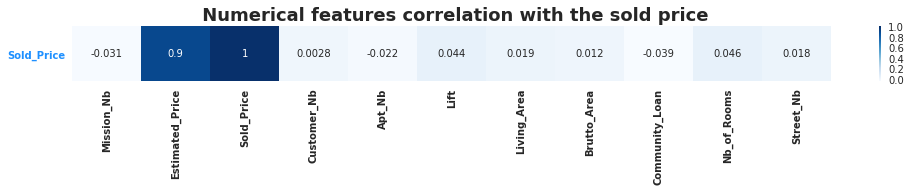

In [0]:
num=data.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['Sold_Price'], ascending=False).head(1), cmap='Blues', annot = True)
plt.title(" Numerical features correlation with the sold price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

> - Correlation of all numerical features with target target feature not seems to be good except `'Estimated_Prices'`.
> - `'Estimated_Prices'` is also having large number of null values so we cant depend much on it.

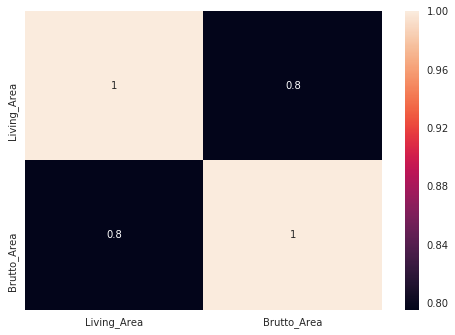

In [0]:
sns.heatmap(data[(data.Brutto_Area.notna() & data.Brutto_Area > 0) & (data.Living_Area.notna() & data.Living_Area > 0)][['Living_Area','Brutto_Area']].corr(),annot = True)

> - We can drop `'Brutto_Area'` too as it having high correlation with `'Living_Area'`. One more reason is it having more number null values as seen in very first graph above.

In [0]:
data.drop(['Brutto_Area','Estimated_Price'],axis = 1, inplace = True)

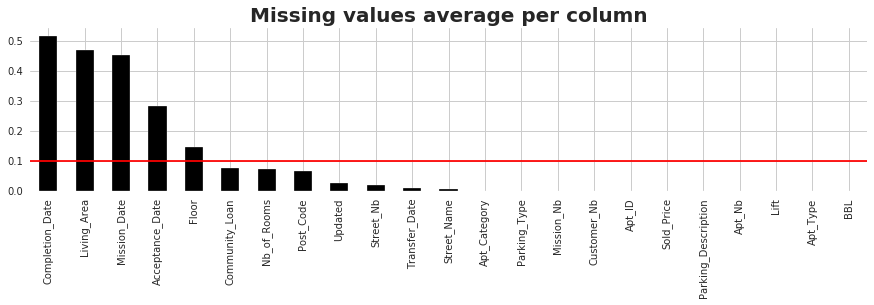

In [0]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.subplots(0,0,figsize=(15,3))
data.isna().mean().sort_values(ascending=False).plot.bar(color='black')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.title('Missing values average per column', fontsize=20, weight='bold' )
plt.show()

In [0]:
c=data.dropna(thresh=len(data)*0.5, axis=1)
print('We dropped ',data.shape[1]-c.shape[1], ' features in the dataset')
data = c

We dropped  1  features in the dataset


# As of now we will not consider any date for our model building.

In [0]:
data_df = data.drop(['Mission_Date', 'Acceptance_Date', 'Transfer_Date','Updated'],axis = 1)          

In [0]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533746 entries, 0 to 998393
Data columns (total 18 columns):
BBL                    533746 non-null object
Mission_Nb             533746 non-null int64
Apt_ID                 533746 non-null object
Sold_Price             533746 non-null float64
Customer_Nb            533746 non-null int64
Apt_Nb                 533746 non-null int64
Floor                  455551 non-null object
Lift                   533746 non-null bool
Living_Area            282330 non-null float64
Community_Loan         492652 non-null float64
Apt_Type               533746 non-null object
Apt_Category           533628 non-null object
Nb_of_Rooms            493755 non-null float64
Post_Code              497054 non-null object
Street_Nb              522760 non-null float64
Street_Name            530632 non-null object
Parking_Type           533744 non-null object
Parking_Description    533746 non-null object
dtypes: bool(1), float64(5), int64(3), object(9)
memory usage

In [0]:
NA = data_df[['Floor','Living_Area','Community_Loan','Apt_Category','Nb_of_Rooms','Post_Code','Street_Nb','Street_Name','Parking_Type']]

In [0]:
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print('We have :',NAcat.shape[1],'categorical features with missing values')
print('We have :',NAnum.shape[1],'numerical features with missing values')

We have : 5 categorical features with missing values
We have : 4 numerical features with missing values


> - So, 5 categorical features and 4 numerical features to clean.
> - We start with the numerical features, first thing to do is have a look at them to learn more about their distribution and decide how to clean them.

In [0]:
NA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533746 entries, 0 to 998393
Data columns (total 9 columns):
Floor             455551 non-null object
Living_Area       282330 non-null float64
Community_Loan    492652 non-null float64
Apt_Category      533628 non-null object
Nb_of_Rooms       493755 non-null float64
Post_Code         497054 non-null object
Street_Nb         522760 non-null float64
Street_Name       530632 non-null object
Parking_Type      533744 non-null object
dtypes: float64(4), object(5)
memory usage: 40.7+ MB


In [0]:
data_df.drop((data_df[data_df.Street_Nb.isna()]).index, axis = 0, inplace = True)
data_df.drop((data_df[data_df.Street_Name.isna()]).index, axis = 0, inplace = True)
data_df.drop((data_df[data_df.Post_Code.isna()]).index, axis = 0, inplace = True)

In [0]:
room_vs_area = NA[(NA.Living_Area.notna()) & (NA.Living_Area > 0) & (NA.Nb_of_Rooms.notna())][['Living_Area','Nb_of_Rooms']]

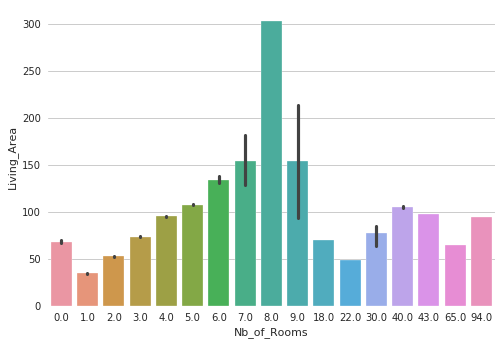

In [0]:
sns.barplot(room_vs_area.Nb_of_Rooms,room_vs_area.Living_Area)

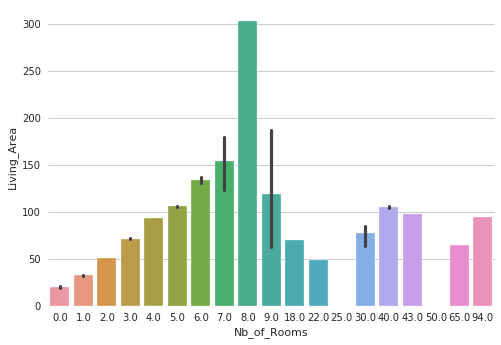

In [0]:
sns.barplot(data_df.Nb_of_Rooms,data_df.Living_Area)

> - By oberserving above result, we can fill null values in `'Nb_of_Rooms'` with help of `'Living_Area'` and vice-versa.

In [0]:
data_df[data_df.Living_Area.isna() & (data_df.Nb_of_Rooms.notna())][['Living_Area']]

,Living_Area
1,NaN
5,NaN
6,NaN
34,NaN
44,NaN
...,...
998383,NaN
998385,NaN
998387,NaN
998391,NaN


In [0]:
data_df.Living_Area = data_df.groupby("Nb_of_Rooms")['Living_Area'].apply(lambda x: x.fillna(x.mean()))

In [0]:
data_df.drop(data_df[data_df.Nb_of_Rooms.isna()].index,axis = 0,inplace = True)

In [0]:
data_df.drop(data_df[data_df.Living_Area.isna()].index,axis = 0,inplace = True)

In [0]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462530 entries, 0 to 998393
Data columns (total 18 columns):
BBL                    462530 non-null object
Mission_Nb             462530 non-null int64
Apt_ID                 462530 non-null object
Sold_Price             462530 non-null float64
Customer_Nb            462530 non-null int64
Apt_Nb                 462530 non-null int64
Floor                  405384 non-null object
Lift                   462530 non-null bool
Living_Area            462530 non-null float64
Community_Loan         443155 non-null float64
Apt_Type               462530 non-null object
Apt_Category           462530 non-null object
Nb_of_Rooms            462530 non-null float64
Post_Code              462530 non-null object
Street_Nb              462530 non-null float64
Street_Name            462530 non-null object
Parking_Type           462528 non-null object
Parking_Description    462530 non-null object
dtypes: bool(1), float64(5), int64(3), object(9)
memory usage

> - Now we have only 3 columns with null values.
> - Out of that `'Floor'`, `'Community_Loan'` we need to clean. `'Parking_Type'` having null values we can drop

In [0]:
data_df.drop(data_df[data_df.Parking_Type.isna()].index,axis = 0,inplace = True)

In [0]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462528 entries, 0 to 998393
Data columns (total 18 columns):
BBL                    462528 non-null object
Mission_Nb             462528 non-null int64
Apt_ID                 462528 non-null object
Sold_Price             462528 non-null float64
Customer_Nb            462528 non-null int64
Apt_Nb                 462528 non-null int64
Floor                  405382 non-null object
Lift                   462528 non-null bool
Living_Area            462528 non-null float64
Community_Loan         443153 non-null float64
Apt_Type               462528 non-null object
Apt_Category           462528 non-null object
Nb_of_Rooms            462528 non-null float64
Post_Code              462528 non-null object
Street_Nb              462528 non-null float64
Street_Name            462528 non-null object
Parking_Type           462528 non-null object
Parking_Description    462528 non-null object
dtypes: bool(1), float64(5), int64(3), object(9)
memory usage

> -  **There are few points that we need look for `Floor` column.**
> >  1. Due to multiple random values present in `'Floor'` column due to data entry.
> >  2. After knowing valid values for `'Floor'` column only we can clean it properly.
> >  3. As of now it is better to drop `'Floor'`

In [0]:
to_rep = ['00','01','02','03','04','05','06','07','08','09','10','   0','   1','   2','   3','   4','   5',' 1',' 2',' 3',' 4',' 5',\
         '1 ','2 ','3 ','4 ','5 ','1  ','2  ','3  ','4  ','5  ','1.','2.','3.','4.','5.',\
         '    0','    1','    2','    3','    4','    5']

In [0]:
with_rep = [0,1,2,3,4,5,6,7,8,9,10,0,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,0,1,2,3,4,5]

In [0]:
data_df.Floor = data_df.Floor.replace(to_rep,with_rep)

In [0]:
data_df.Floor.value_counts()

1        63798
2        59178
3        40504
1        37672
2        35253
         ...  
12163        1
1 etg        1
109          1
3177         1
2263         1
Name: Floor, Length: 1227, dtype: int64

> - Like this we can fill once we get valid value for Floor columns.

In [0]:
data_df.drop('Floor',axis = 1, inplace = True)

In [0]:
data_df.drop(data_df[data_df.Community_Loan.isna()].index, axis = 0, inplace = True)

In [0]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443153 entries, 0 to 998393
Data columns (total 17 columns):
BBL                    443153 non-null object
Mission_Nb             443153 non-null int64
Apt_ID                 443153 non-null object
Sold_Price             443153 non-null float64
Customer_Nb            443153 non-null int64
Apt_Nb                 443153 non-null int64
Lift                   443153 non-null bool
Living_Area            443153 non-null float64
Community_Loan         443153 non-null float64
Apt_Type               443153 non-null object
Apt_Category           443153 non-null object
Nb_of_Rooms            443153 non-null float64
Post_Code              443153 non-null object
Street_Nb              443153 non-null float64
Street_Name            443153 non-null object
Parking_Type           443153 non-null object
Parking_Description    443153 non-null object
dtypes: bool(1), float64(5), int64(3), object(8)
memory usage: 57.9+ MB


# Outliers detection:

### Outliers visualization

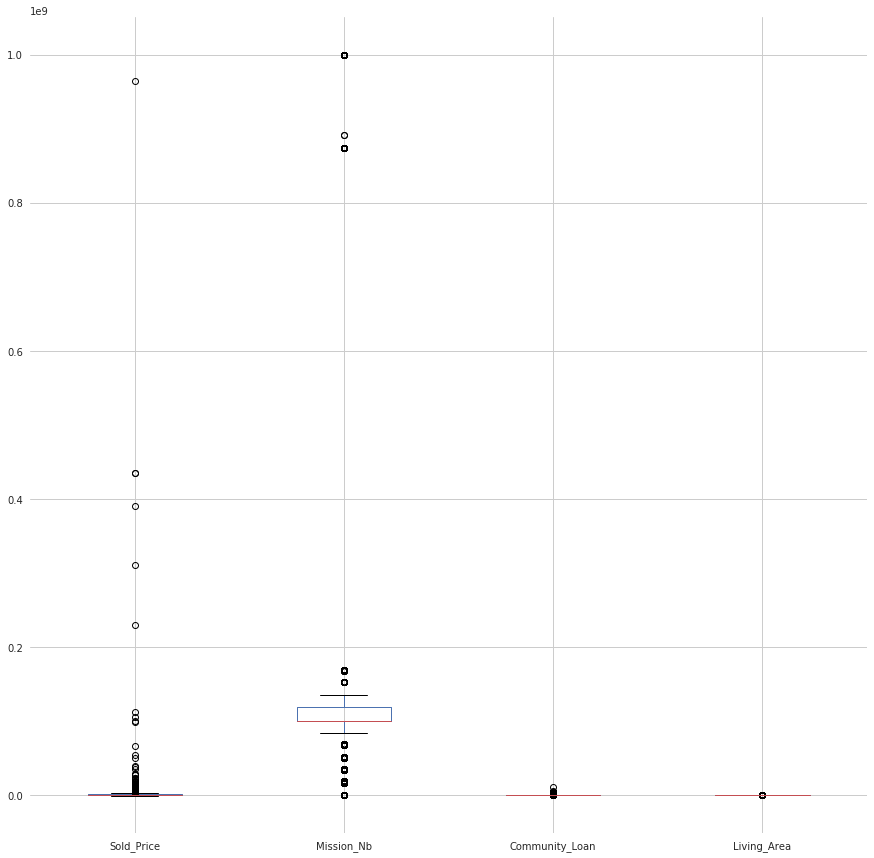

In [0]:
num_data = ['Sold_Price','Mission_Nb','Community_Loan','Living_Area']
num_data = data_df[num_data].astype('float')
num_data.boxplot(figsize = (15,15));

> - As we have cleaned our data already, Outliers are adjusted.

Text(0.5, 1.0, 'Community Loan - Price scatter plot')

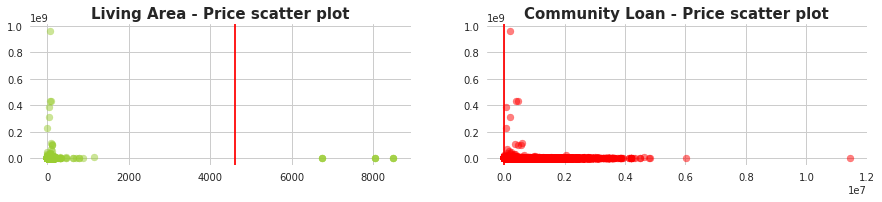

In [0]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((5,2),(0,0))
plt.scatter(x= data_df['Living_Area'], y= data_df['Sold_Price'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Living Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(0,1))
plt.scatter(x= data_df['Community_Loan'], y= data_df['Sold_Price'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Community Loan - Price scatter plot', fontsize=15, weight='bold' )

In [0]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443153 entries, 0 to 998393
Data columns (total 17 columns):
BBL                    443153 non-null object
Mission_Nb             443153 non-null int64
Apt_ID                 443153 non-null object
Sold_Price             443153 non-null float64
Customer_Nb            443153 non-null int64
Apt_Nb                 443153 non-null int64
Lift                   443153 non-null bool
Living_Area            443153 non-null float64
Community_Loan         443153 non-null float64
Apt_Type               443153 non-null object
Apt_Category           443153 non-null object
Nb_of_Rooms            443153 non-null float64
Post_Code              443153 non-null object
Street_Nb              443153 non-null float64
Street_Name            443153 non-null object
Parking_Type           443153 non-null object
Parking_Description    443153 non-null object
dtypes: bool(1), float64(5), int64(3), object(8)
memory usage: 57.9+ MB


### Average value of house based on `'Apt_Type'`

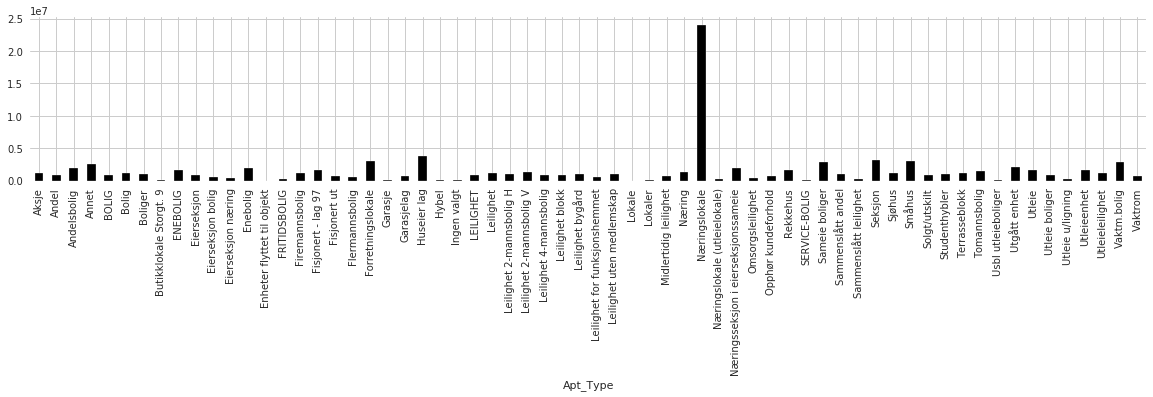

In [0]:
plt.subplots(0,0,figsize=(20,3))
data_df.groupby('Apt_Type')['Sold_Price'].mean().plot.bar(color='black')

### Average value of house based on `'Nb_of_Rooms'`

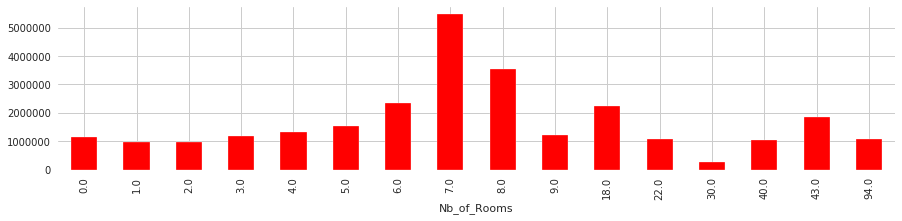

In [0]:
plt.subplots(0,0,figsize=(15,3))
data_df.groupby('Nb_of_Rooms')['Sold_Price'].mean().plot.bar(color='red')

### Average value of house based on `'Lift'`

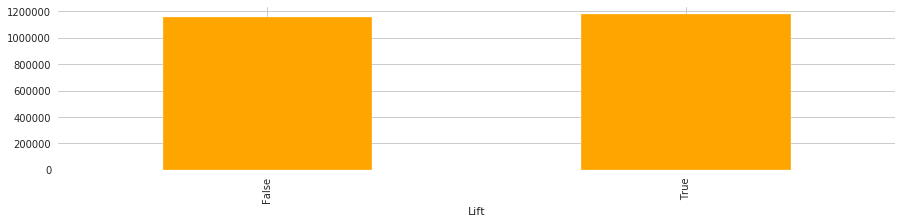

In [0]:
plt.subplots(0,0,figsize=(15,3))
data_df.groupby('Lift')['Sold_Price'].mean().plot.bar(color='orange')

### Average value of house based on `'BBL'`

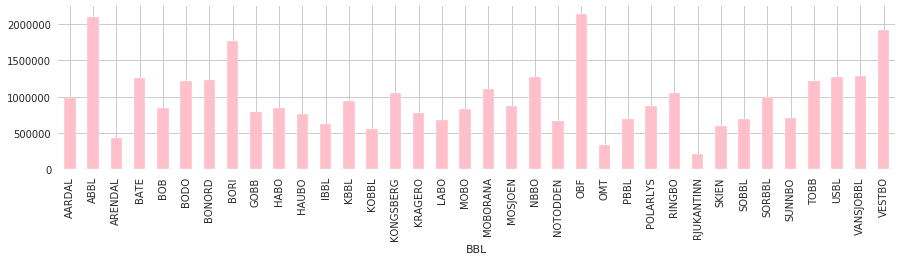

In [0]:
plt.subplots(0,0,figsize=(15,3))
data_df.groupby('BBL')['Sold_Price'].mean().plot.bar(color='pink')

### Average value of house price based on `'Parking_Description'` for first top 50, middle 50 and last 50.

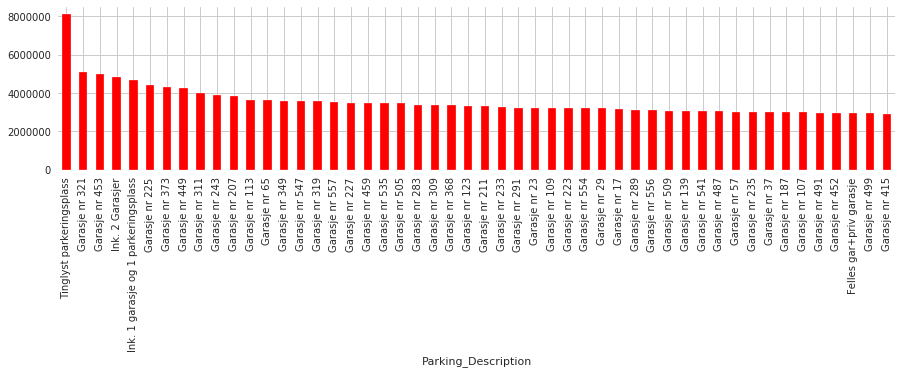

In [0]:
plt.subplots(0,0,figsize=(15,3))
data_df.groupby('Parking_Description')['Sold_Price'].mean().sort_values(ascending = False)[0:50].plot.bar(color='red')

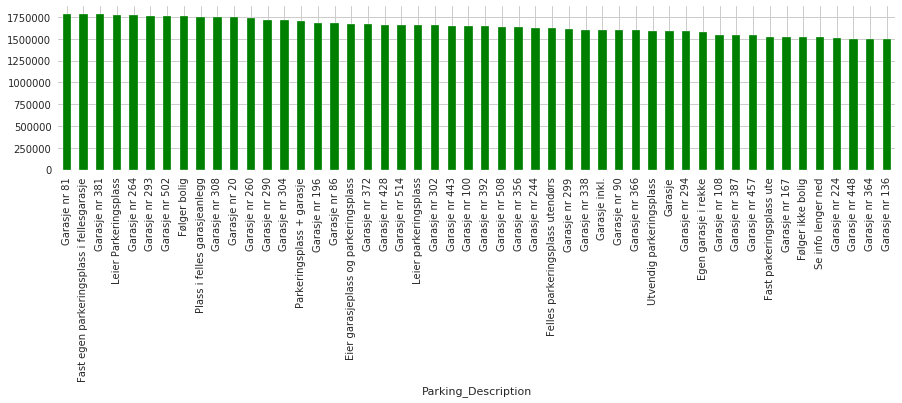

In [0]:
plt.subplots(0,0,figsize=(15,3))
data_df.groupby('Parking_Description')['Sold_Price'].mean().sort_values(ascending = False)[225:275].plot.bar(color='green')

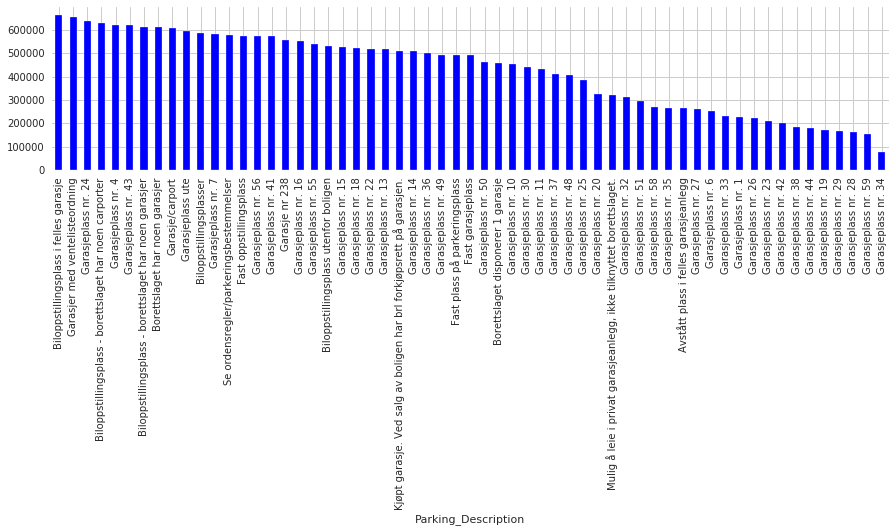

In [0]:
plt.subplots(0,0,figsize=(15,3))
data_df.groupby('Parking_Description')['Sold_Price'].mean().sort_values(ascending = False)[450:509].plot.bar(color='blue')

### Average value of house price based on `'Parking_Type'` for first top 50, middle 50 and last 50.

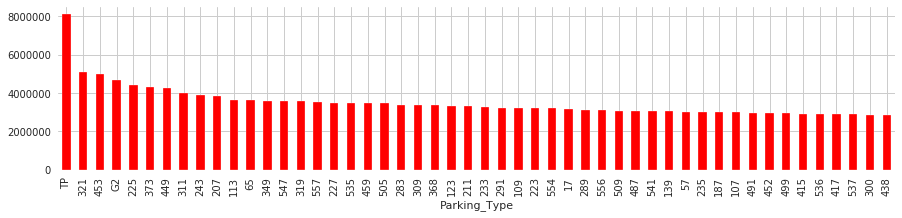

In [0]:
plt.subplots(0,0,figsize=(15,3))
data_df.groupby('Parking_Type')['Sold_Price'].mean().sort_values(ascending = False)[0:50].plot.bar(color='red')

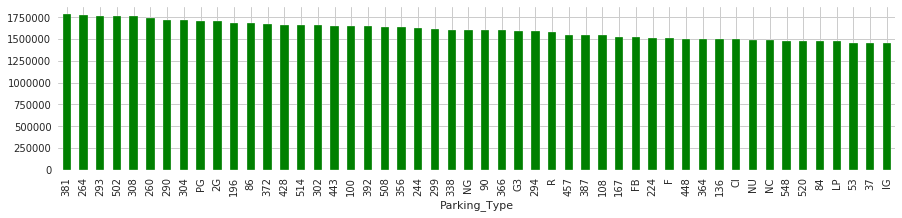

In [0]:
plt.subplots(0,0,figsize=(15,3))
data_df.groupby('Parking_Type')['Sold_Price'].mean().sort_values(ascending = False)[200:250].plot.bar(color='green')

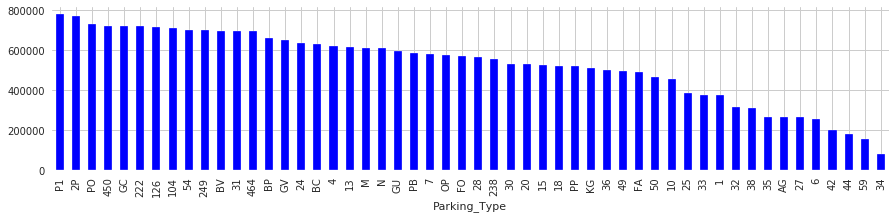

In [0]:
plt.subplots(0,0,figsize=(15,3))
data_df.groupby('Parking_Type')['Sold_Price'].mean().sort_values(ascending = False)[400:452].plot.bar(color='blue')

In [0]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443153 entries, 0 to 998393
Data columns (total 17 columns):
BBL                    443153 non-null object
Mission_Nb             443153 non-null int64
Apt_ID                 443153 non-null object
Sold_Price             443153 non-null float64
Customer_Nb            443153 non-null int64
Apt_Nb                 443153 non-null int64
Lift                   443153 non-null bool
Living_Area            443153 non-null float64
Community_Loan         443153 non-null float64
Apt_Type               443153 non-null object
Apt_Category           443153 non-null object
Nb_of_Rooms            443153 non-null float64
Post_Code              443153 non-null object
Street_Nb              443153 non-null float64
Street_Name            443153 non-null object
Parking_Type           443153 non-null object
Parking_Description    443153 non-null object
dtypes: bool(1), float64(5), int64(3), object(8)
memory usage: 57.9+ MB


In [0]:
data_df.Lift = data_df.Lift.astype('object')

In [0]:
data_df.Nb_of_Rooms = data_df.Nb_of_Rooms.astype('object')

In [0]:
data_df.Street_Nb = data_df.Street_Nb.astype('object')

In [0]:
df = data_df.drop(['Mission_Nb','Apt_ID','Apt_Nb','Customer_Nb'],axis = 1)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443153 entries, 0 to 998393
Data columns (total 13 columns):
BBL                    443153 non-null object
Sold_Price             443153 non-null float64
Lift                   443153 non-null object
Living_Area            443153 non-null float64
Community_Loan         443153 non-null float64
Apt_Type               443153 non-null object
Apt_Category           443153 non-null object
Nb_of_Rooms            443153 non-null object
Post_Code              443153 non-null object
Street_Nb              443153 non-null object
Street_Name            443153 non-null object
Parking_Type           443153 non-null object
Parking_Description    443153 non-null object
dtypes: float64(3), object(10)
memory usage: 47.3+ MB


## Encoding categorical columns into numerical with one hot encoding technique.

In [0]:
# Get dummies
input_data = df.drop('Sold_Price',axis = 1)
# Get dummies
bbl = pd.get_dummies(input_data.BBL, prefix_sep='_',)
lift = pd.get_dummies(input_data.Lift, prefix_sep='_',) 
apt_type = pd.get_dummies(input_data.Apt_Type, prefix_sep='_',)
apt_category = pd.get_dummies(input_data.Apt_Category, prefix_sep='_',)

In [0]:
nb_of_rooms = pd.get_dummies(input_data.Nb_of_Rooms, prefix_sep='_',)

In [0]:
street_nb = pd.get_dummies(input_data.Street_Nb, prefix_sep='_',)

In [0]:
street_name = pd.get_dummies(input_data.Street_Name, prefix_sep='_',)

In [0]:
parking_type = pd.get_dummies(input_data.Parking_Type, prefix_sep='_',)

In [0]:
post_code = pd.get_dummies(input_data.Post_Code, prefix_sep='_',)

In [0]:
parking_description = pd.get_dummies(input_data.Parking_Description, prefix_sep='_',)

In [0]:
cols = [bbl,lift,apt_type,apt_category,nb_of_rooms,street_nb,street_name,parking_type,post_code,parking_description]

In [0]:
parking_description.shape

(443153, 509)

In [0]:
for i in cols:
    print('Shape is' , i.shape)

Shape is (443153, 36)
Shape is (443153, 2)
Shape is (443153, 64)
Shape is (443153, 8823)
Shape is (443153, 16)
Shape is (443153, 654)
Shape is (443153, 4663)
Shape is (443153, 452)
Shape is (443153, 1872)
Shape is (443153, 509)


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443153 entries, 0 to 998393
Data columns (total 13 columns):
BBL                    443153 non-null object
Sold_Price             443153 non-null float64
Lift                   443153 non-null object
Living_Area            443153 non-null float64
Community_Loan         443153 non-null float64
Apt_Type               443153 non-null object
Apt_Category           443153 non-null object
Nb_of_Rooms            443153 non-null object
Post_Code              443153 non-null object
Street_Nb              443153 non-null object
Street_Name            443153 non-null object
Parking_Type           443153 non-null object
Parking_Description    443153 non-null object
dtypes: float64(3), object(10)
memory usage: 47.3+ MB


# Machine Learning

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

In [0]:
X = pd.concat([bbl,df[['Living_Area','Community_Loan']],lift,apt_type,nb_of_rooms], axis=1)

In [0]:
X

,AARDAL,ABBL,ARENDAL,BATE,BOB,BODO,BONORD,BORI,GOBB,HABO,HAUBO,IBBL,KBBL,KOBBL,KONGSBERG,KRAGERO,LABO,MOBO,MOBORANA,MOSJOEN,NBBO,NOTODDEN,OBF,OMT,PBBL,POLARLYS,RINGBO,RJUKANTINN,SKIEN,SOBBL,SORBBL,SUNNBO,TOBB,USBL,VANSJOBBL,VESTBO,Living_Area,Community_Loan,False,True,...,Næringsseksjon i eierseksjonssameie,Omsorgsleilighet,Opphør kundeforhold,Rekkehus,SERVICE-BOLIG,Sameie boliger,Sammenslått andel,Sammenslått leilighet,Seksjon,Sjøhus,Småhus,Solgt/utskilt,Studenthybler,Terrasseblokk,Tomannsbolig,Usbl utleieboliger,Utgått enhet,Utleie,Utleie boliger,Utleie u/ligning,Utleieenhet,Utleieleilighet,Vaktm.bolig,Vaktrom,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,18.0,22.0,30.0,40.0,43.0,94.0
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90.000000,278646.84,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,50.657101,331240.05,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93.380962,197532.86,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71.269978,187704.85,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,137910.68,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,71.269978,381965.01,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
998385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,32.433869,161009.13,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,71.269978,194990.33,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
998391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,50.657101,160799.81,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y = np.array(df['Sold_Price'])

### we split them to train and test sets

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = .30, random_state=0)

### We use RobustScaler to scale our data because it's powerful against outliers, we already detected some but there must be some other outliers out there, I will try to find them in future versions of the kernel

In [0]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)

# Linear regression

> - We first start by trying the very basic regression model: Linear regression.

> - We use 5- Fold cross validation for a better error estimate:

In [0]:
from sklearn.linear_model import LinearRegression

lreg=LinearRegression()
MSEs=ms.cross_val_score(lreg, X, y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))

-1.2998797707103e+19
RMSE = 3605384543.582418


We get an RMSE=3605384543.582418.

Our goal is to minimize the error, we use regularization methods: Ridge, Lasso and ElasticNet, in order to lower the squared error

# Regularization:
## Ridge regression:
> - Minimize squared error + a term alpha that penalizes the error
> - We need to find a value of alpha that minimizes the train and test error (avoid overfitting)



In [0]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=14 is: ",math.sqrt(-ridge_reg.best_score_))

The best value of Alpha is:  {'alpha': 2}
The best score achieved with Alpha=14 is:  1426476.565979101


> - Alpha=2

In [0]:
ridge_mod=Ridge(alpha=19)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))

Root Mean Square Error train = 1426020.9428684963
Root Mean Square Error test = 3244685.3187681055


# Lasso regression

In [0]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}

lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print('The best value of Alpha is: ',lasso_reg.best_params_)

In [0]:
from xgboost.sklearn import XGBRegressor

In [0]:
xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgmod=xgb.fit(x_train,y_train)
xg_pred=xgmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, xg_pred))))

Root Mean Square Error test = 3238257.0539594237


# ENSEMBLE METHODS:
## VOTING REGRESSOR:
> - A voting regressor is an ensemble meta-estimator that fits base regressors each on the whole dataset. It, then, averages the individual predictions to form a final prediction.
> - After running the regressors, we combine them first with voting regressor in order to get a better model

In [0]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv), 
                            ('XGBRegressor', xgb)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, vote_pred))))

NameError: ignored